# packages

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [2]:
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn
!pip install --upgrade scipy
!pip install imbalanced-learn==0.8.0

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


#from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


  Using cached imbalanced_learn-0.8.0-py3-none-any.whl.metadata (11 kB)
Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.0
    Uninstalling imbalanced-learn-0.8.0:
      Successfully uninstalled imbalanced-learn-0.8.0


# Importing Data

In [3]:
df=pd.read_csv('taiwanese_bankruptcy.csv')
df.columns # columns have space in the begining

#fix the structure of the column names
col_names=[]
for c in df.columns:
    col_names.append(c[1:])
    
col_names[0]='bankrupt'
col_names[0]

#use new names for df
df.columns=col_names

df_s = df.columns[df.columns.str.contains('profit', case=False)].tolist()
df_s

['Operating Profit Rate',
 'Operating Profit Per Share (Yuan ¥)',
 'Per Share Net profit before tax (Yuan ¥)',
 'Realized Sales Gross Profit Growth Rate',
 'Operating Profit Growth Rate',
 'After-tax Net Profit Growth Rate',
 'Regular Net Profit Growth Rate',
 'Continuous Net Profit Growth Rate',
 'Operating profit/Paid-in capital',
 'Net profit before tax/Paid-in capital',
 'Operating profit per person',
 'Gross Profit to Sales']

In [4]:
#check for data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   bankrupt                                                 6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

In [5]:
df.head()

,bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [6]:
df.describe()

,bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [7]:
df.nunique().sort_values() ##number of unique values for each column

Net Income Flag                       1
bankrupt                              2
Liability-Assets Flag                 2
Total Asset Turnover                381
Net Worth Turnover Rate (times)     741
                                   ... 
Current Liabilities/Equity         6819
Working Capital/Equity             6819
Operating Funds to Liability       6819
Cash Flow to Total Assets          6819
Equity to Liability                6819
Length: 96, dtype: int64

In [8]:
#drop the 2 columns that only have low number of unuque values.
df.drop(columns=['Net Income Flag', 'Liability-Assets Flag'])

,bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.118250,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.047775,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.025346,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.067250,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.047725,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.027951,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.031470,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.007542,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.022916,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,0.044009


<Axes: title={'center': 'Class Balance'}, xlabel='Bankrupt', ylabel='Frequency'>

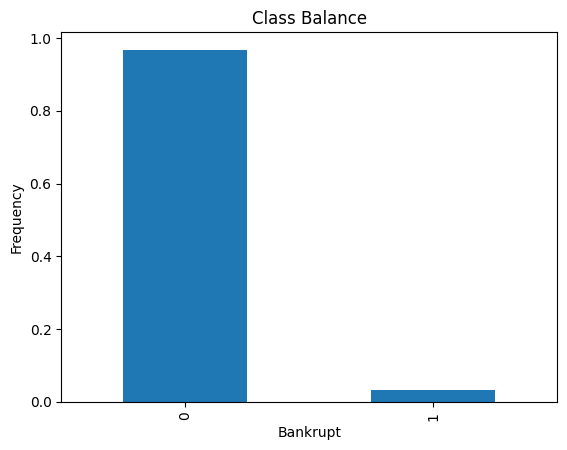

In [9]:
#Inspect the target variable
df['bankrupt'].value_counts(normalize=True).plot(kind='bar', xlabel='Bankrupt', ylabel='Frequency', title='Class Balance')

- Figure comments: The graph does show an imbalanced dataset, where our False class is far bigger than our True class. During the preproccessing of the data, undersampling and oversampling techinque will be used.

# Exploratory Analysis

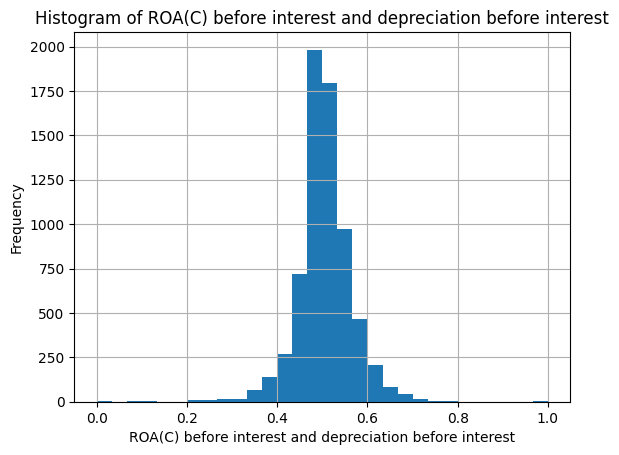

In [10]:
df.dropna()
df['ROA(C) before interest and depreciation before interest'].hist(bins=30)  # Adjust the number of bins as needed

# Add labels and title
plt.xlabel('ROA(C) before interest and depreciation before interest')
plt.ylabel('Frequency')
plt.title('Histogram of ROA(C) before interest and depreciation before interest')

# Show the plot
plt.show()

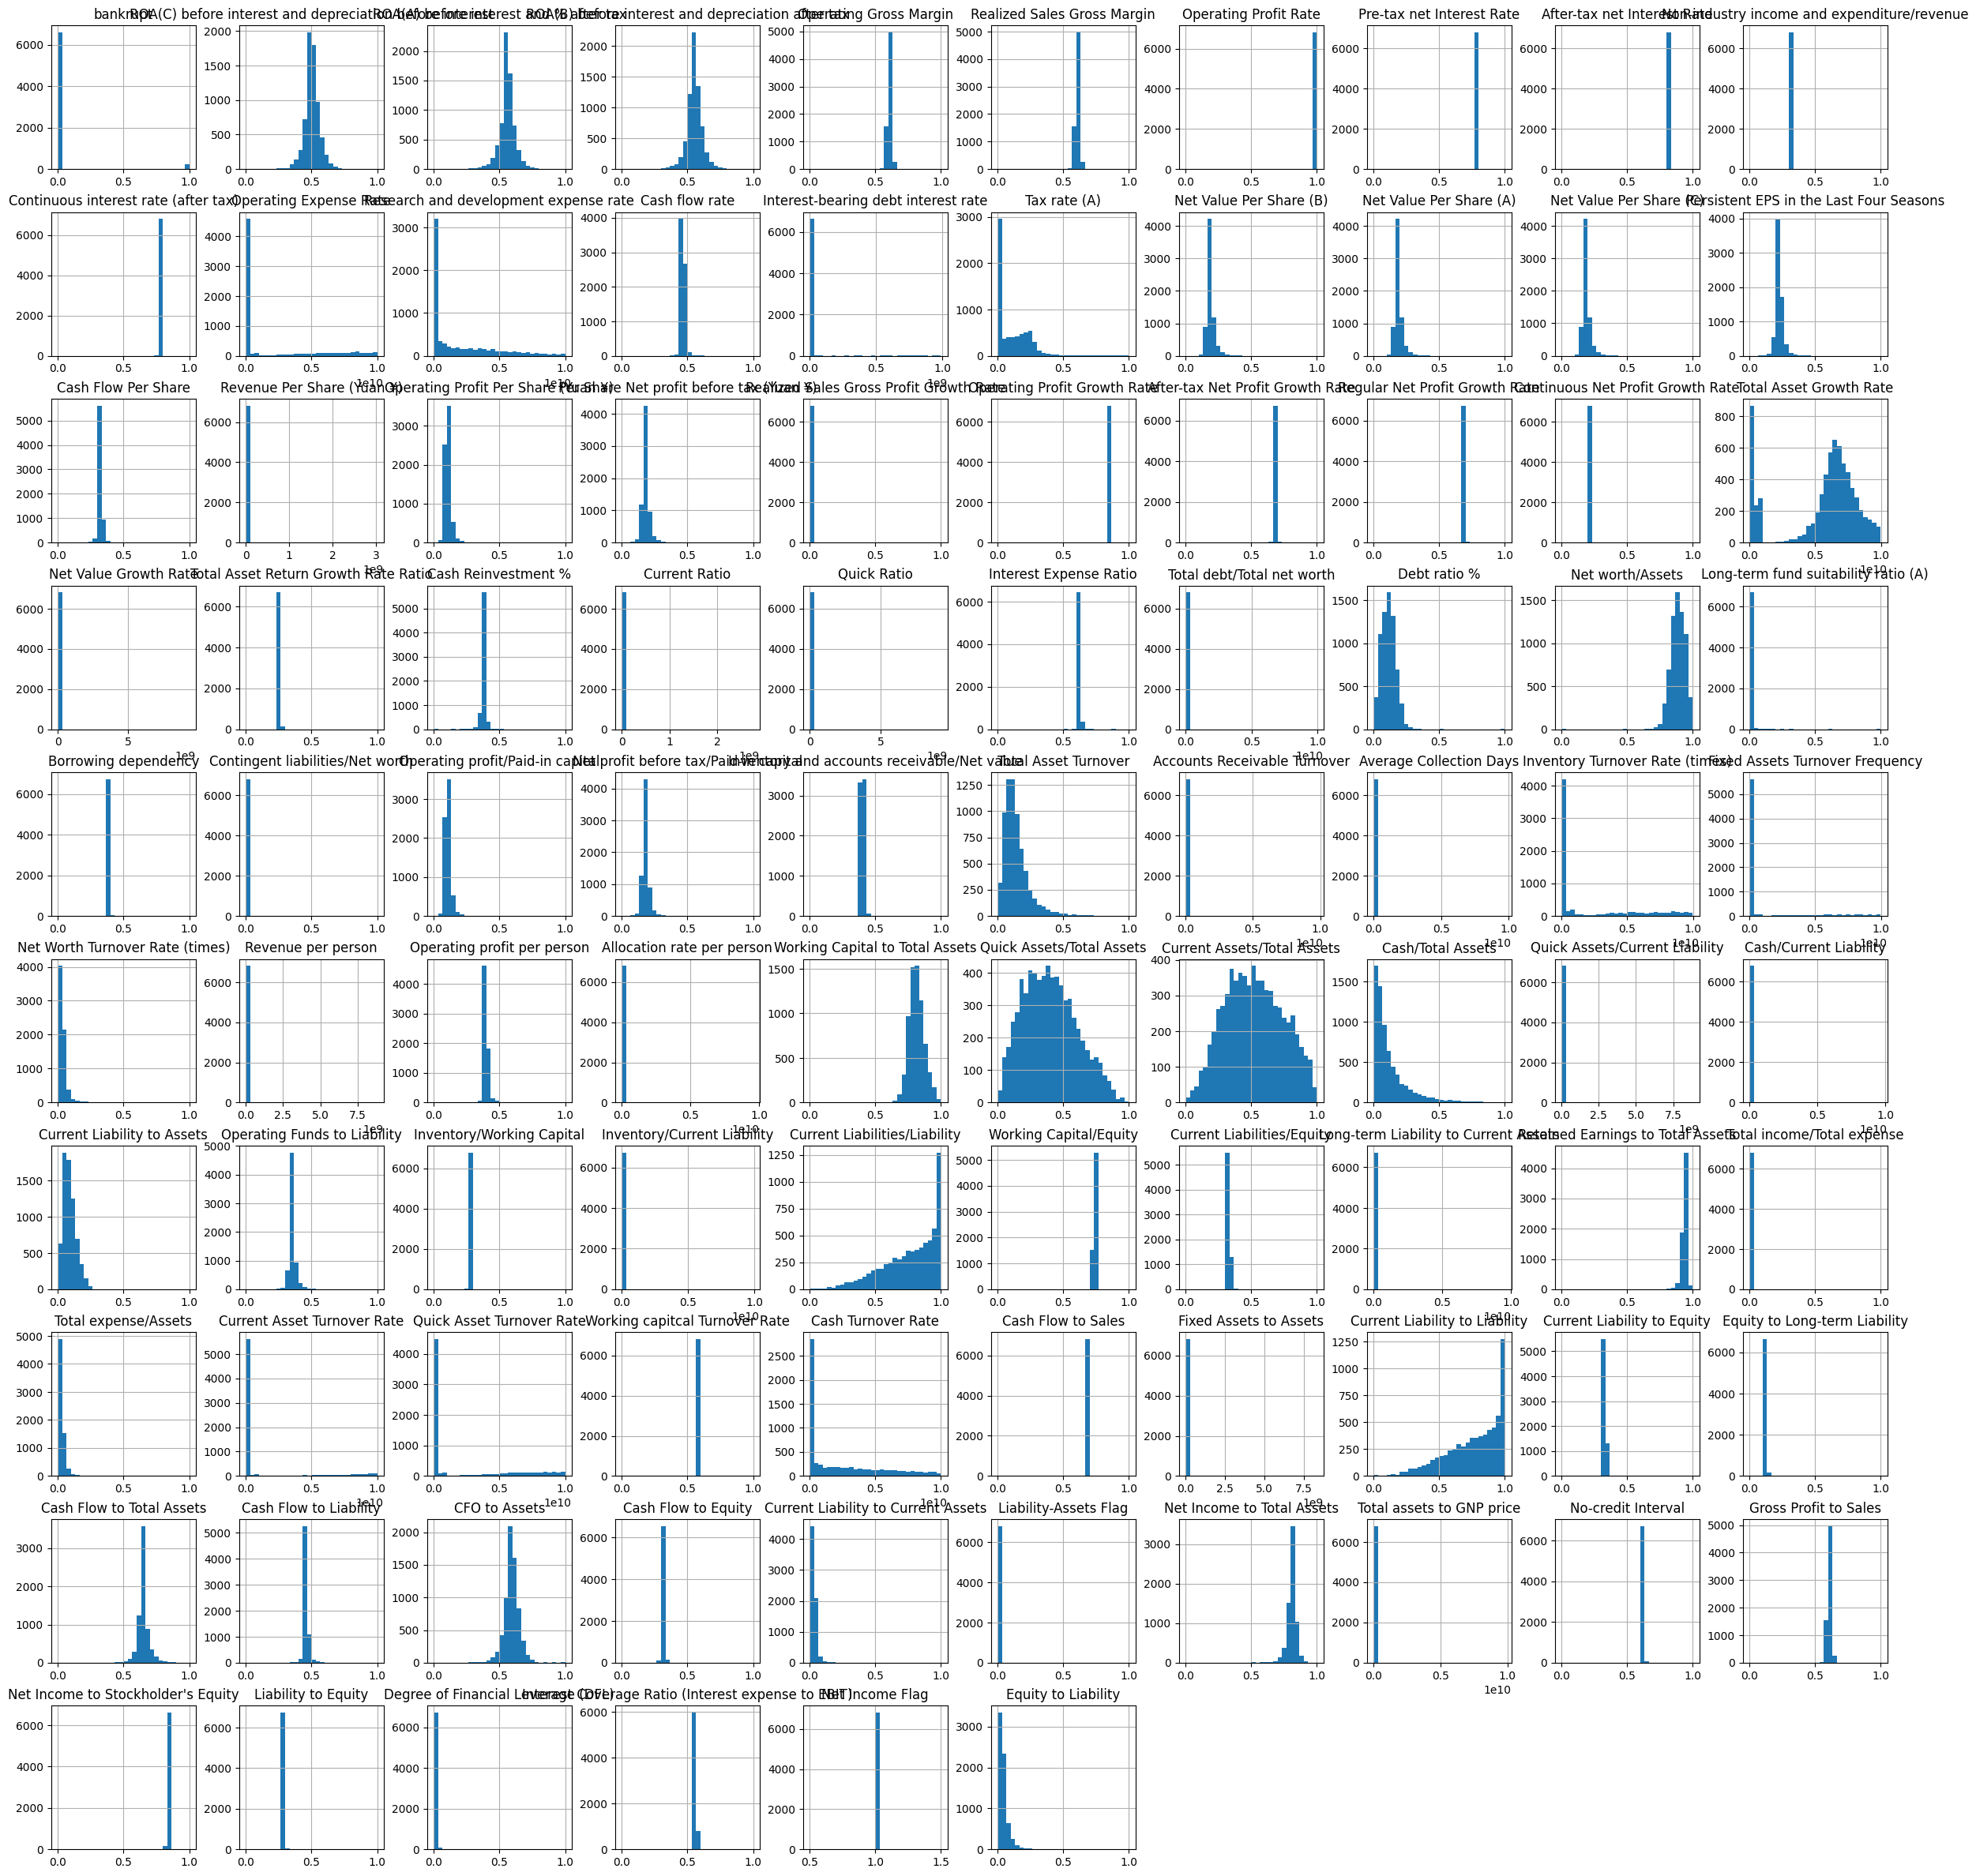

In [11]:
df.hist(figsize=(30,30), bins=30); 

- It appears that there are outliers in the data, as indicated by the histograms having a single peak but potentially showing a long tail or extreme values away from the main concentration of data. This suggests that while most of the values are clustered around a central value, there are a few extreme observations that could be skewing the distribution. These outliers could significantly affect the model's performance and might need to be addressed through techniques like trimming, winsorizing, or transforming the data before further analysis.

In [12]:


#Identify Highly correlated variable, helps identify signs of multicolinearity
correlation_matrix =df.corr()
correlation_matrix = correlation_matrix.where((correlation_matrix > 0.90) & (correlation_matrix < 1)) # correlations over .85

# Drop rows and columns with NaN values to focus on correlations above 0.9
high_correlation = correlation_matrix.dropna(how='all', axis=0).dropna(how='all', axis=1)
high_correlation

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Continuous interest rate (after tax),Net Value Per Share (B),...,Borrowing dependency,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Current Liabilities/Equity,Working capitcal Turnover Rate,Cash Flow to Sales,Current Liability to Equity,Net Income to Total Assets,Gross Profit to Sales,Liability to Equity
ROA(C) before interest and depreciation before interest,NaN,0.940124,0.986849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ROA(A) before interest and % after tax,0.940124,NaN,0.955741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.961552,NaN,NaN
ROA(B) before interest and depreciation after tax,0.986849,0.955741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.912040,NaN,NaN
Operating Gross Margin,NaN,NaN,NaN,NaN,0.999518,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
Realized Sales Gross Margin,NaN,NaN,NaN,0.999518,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999518,NaN
Operating Profit Rate,NaN,NaN,NaN,NaN,NaN,NaN,0.916448,NaN,0.915544,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pre-tax net Interest Rate,NaN,NaN,NaN,NaN,NaN,0.916448,NaN,0.986379,0.993617,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
After-tax net Interest Rate,NaN,NaN,NaN,NaN,NaN,NaN,0.986379,NaN,0.984452,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Continuous interest rate (after tax),NaN,NaN,NaN,NaN,NaN,0.915544,0.993617,0.984452,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Net Value Per Share (B),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
to_drop = set() 

# Iterate through the correlation matrix to eliminate mulicolinearity
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            to_drop.add(colname)

In [14]:
to_drop

{'After-tax net Interest Rate',
 'Cash Flow to Sales',
 'Continuous interest rate (after tax)',
 'Gross Profit to Sales',
 'Liability to Equity',
 'Net Income to Total Assets',
 'Net Value Per Share (A)',
 'Net Value Per Share (C)',
 'Net profit before tax/Paid-in capital',
 'Operating profit/Paid-in capital',
 'Per Share Net profit before tax (Yuan ¥)',
 'Pre-tax net Interest Rate',
 'ROA(A) before interest and % after tax',
 'ROA(B) before interest and depreciation after tax',
 'Realized Sales Gross Margin',
 'Regular Net Profit Growth Rate'}

In [15]:
df.drop(columns=to_drop) 

,bankrupt,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),...,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.601457,0.998969,0.302646,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,...,0.312905,0.118250,0,0.009219,0.622879,0.827890,0.026601,0.564050,1,0.016469
1,1,0.464291,0.610235,0.998946,0.303556,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,...,0.314163,0.047775,0,0.008323,0.623652,0.839969,0.264577,0.570175,1,0.020794
2,1,0.426071,0.601450,0.998857,0.302035,2.361297e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,...,0.314515,0.025346,0,0.040003,0.623841,0.836774,0.026555,0.563706,1,0.016474
3,1,0.399844,0.583541,0.998700,0.303350,1.078888e-04,0.000000e+00,0.465705,4.490449e-04,0.000000,...,0.302382,0.067250,0,0.003252,0.622929,0.834697,0.026697,0.564663,1,0.023982
4,1,0.465022,0.598783,0.998973,0.303475,7.890000e+09,0.000000e+00,0.462746,6.860686e-04,0.000000,...,0.311567,0.047725,0,0.003878,0.623521,0.839973,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.604455,0.998992,0.303510,1.510213e-04,4.500000e+09,0.463734,1.790179e-04,0.113372,...,0.314063,0.027951,0,0.000466,0.623620,0.840359,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.598308,0.998992,0.303520,5.220000e+09,1.440000e+09,0.461978,2.370237e-04,0.371596,...,0.314446,0.031470,0,0.001959,0.623931,0.840306,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.610444,0.998984,0.303512,2.509312e-04,1.039086e-04,0.472189,0.000000e+00,0.490839,...,0.313353,0.007542,0,0.002840,0.624156,0.840138,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.607850,0.999074,0.303498,1.236154e-04,2.510000e+09,0.476123,2.110211e-04,0.181294,...,0.320118,0.022916,0,0.002837,0.623957,0.841084,0.026822,0.565302,1,0.044009


In [37]:
# Data cleaning
def remove_outliers(df):
    # Iterate through each numerical column
    for column in df.drop(columns='bankrupt').columns:
      
        mean=df[column].mean()
        std=df[column].std()

        lower_bound= mean - 3.5*std
        upper_bound= mean +3.5* std
        
        # Filter out the outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

    
df_cleaned= remove_outliers(df)

In [39]:
df_cleaned= df_cleaned.dropna()

df_cleaned

,bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801
10,0,0.482475,0.567543,0.538198,0.614026,0.614026,0.998978,0.797535,0.809460,0.303759,...,0.814111,0.076972,0.623687,0.614021,0.841337,0.278356,0.026971,0.565892,1,0.036572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6808,0,0.499537,0.551406,0.548798,0.606805,0.606805,0.999000,0.797419,0.809338,0.303511,...,0.805521,0.001068,0.623854,0.606799,0.841047,0.283218,0.026927,0.565734,1,0.021572
6811,0,0.518062,0.567870,0.565823,0.612736,0.612527,0.999140,0.797745,0.809603,0.303789,...,0.815844,0.003725,0.622780,0.612735,0.841355,0.277588,0.026864,0.565483,1,0.043531
6812,0,0.491639,0.549498,0.537877,0.613219,0.613168,0.998999,0.797436,0.809344,0.303543,...,0.806743,0.000548,0.623743,0.613219,0.840676,0.276560,0.026811,0.565253,1,0.061753
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890


# Lassoo

In [ ]:
# Lasso Logistic Regression
#remove unnessary features

In [19]:
x= df.drop(columns='bankrupt')
y= df['bankrupt']

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.2, random_state=42)


10572 10572 2626 2626


<Axes: title={'center': 'Class Balance'}, xlabel='Bankrupt', ylabel='Frequency'>

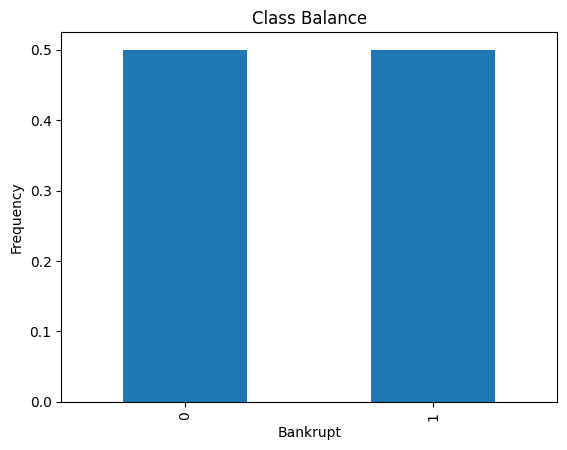

In [20]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#fix the imbalaced using oversampler
over_sampler = RandomOverSampler(random_state=42)
x_train_over, y_train_over = over_sampler.fit_resample(x_train, y_train)
x_test_over, y_test_over = over_sampler.fit_resample(x_test, y_test)
print(len(x_train_over), len(y_train_over), len(x_test_over), len(y_test_over))

#check imbalanced 
y_train_over.value_counts(normalize=True).plot(kind='bar', xlabel='Bankrupt', ylabel='Frequency', title='Class Balance') 


In [61]:
# fix using the undersampling
under_sampler = RandomUnderSampler(random_state=42)
x_train_under, y_train_under = under_sampler.fit_resample(x_train, y_train)
x_test_under, y_test_under = under_sampler.fit_resample(x_test, y_test)
print(len(x_train_under), len(y_train_under), len(x_test_under), len(y_test_under))

#check imbalanced 
y_train_under.value_counts(normalize=True).plot(kind='bar', xlabel='Bankrupt', ylabel='Frequency', title='Class Balance') 

338 338 102 102


In [67]:
#funciton that looks at ther performace of the sampling techniques
from sklearn.preprocessing import StandardScaler
def features(x_train, x_test, y_train, y_test, method):
    # Standardize the data
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Range of alpha values (C in LogisticRegression)
    alphas = np.linspace(0.001, 1, 50)

    test_scores = []
    train_scores = []
    cv_scores = []
    cv_std = []

    # Loop over different alpha values (inverse of regularization strength)
    for i in alphas:
        model = LogisticRegression(solver='liblinear', penalty='l1', random_state=42, C=i)
        
        # Cross-validation score (accuracy)
        cv_score = cross_val_score(model, x_train_scaled, y_train,
                                    scoring='accuracy', cv=RepeatedKFold(n_splits=5, random_state=42))
        
        # Fit the model on the training data
        model.fit(x_train_scaled, y_train)
        
        # Evaluate train accuracy
        y_pred_train = model.predict(x_train_scaled)
        train_accuracy = accuracy_score(y_train, y_pred_train)
        train_scores.append(train_accuracy)

        # Evaluate test accuracy
        y_pred = model.predict(x_test_scaled)
        test_score = accuracy_score(y_test, y_pred)
        test_scores.append(test_score)
                       
        # Get the mean and standard deviation of cross-validation scores
        mean = np.mean(cv_score)
        std = np.std(cv_score)
        cv_scores.append(mean)
        cv_std.append(std)

    # Find optimal alpha based on the maximum cross-validation score
    optimal_index = np.argmax(cv_scores)
    optimal_alpha = alphas[optimal_index]
    optimal_accuracy = cv_scores[optimal_index]

    # Plot the accuracy scores for different alphas
    plt.plot(alphas, cv_scores, label='CV Scores')  # Plot CV scores
    plt.scatter([optimal_alpha], [optimal_accuracy], color='red', marker='x', label='Optimal Alpha')  # Plot optimal alpha
    plt.plot(alphas, train_scores, label='Train Accuracy', color='red')  # Plot Train accuracy
    plt.plot(alphas, test_scores, label='Test Accuracy')  # Plot Test accuracy
    plt.ylabel('Accuracy')
    plt.xlabel('Alphas')
    plt.title(f'Accuracy scores using {method}')
    plt.legend()
    plt.show()

    # Plot standard deviation of cross-validation scores
    plt.plot(alphas, cv_std)
    plt.title('Standard Deviation of CV Scores')
    plt.ylabel('Standard Deviation')
    plt.xlabel('Alphas')
    plt.show()

    print(f'Optimal accuracy: {optimal_accuracy}')
    print(f'Optimal Alpha: {optimal_alpha}')

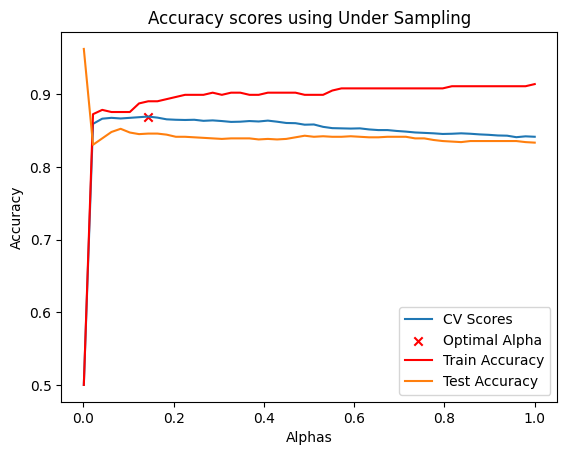

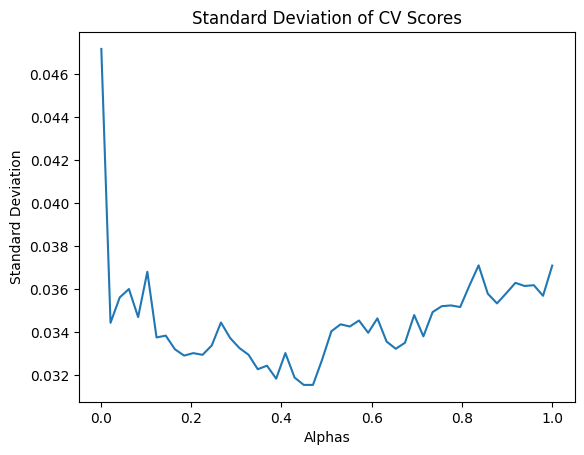

Optimal accuracy: 0.8695083406496926
Optimal Alpha: 0.1437142857142857


In [70]:
method='Under Sampling'
features(x_train_under, x_test, y_train_under ,y_test, method)

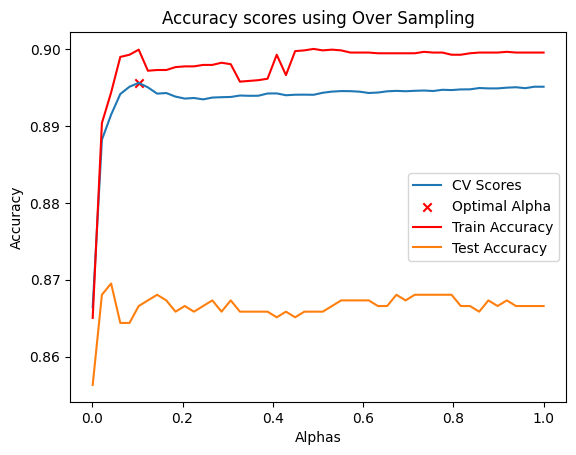

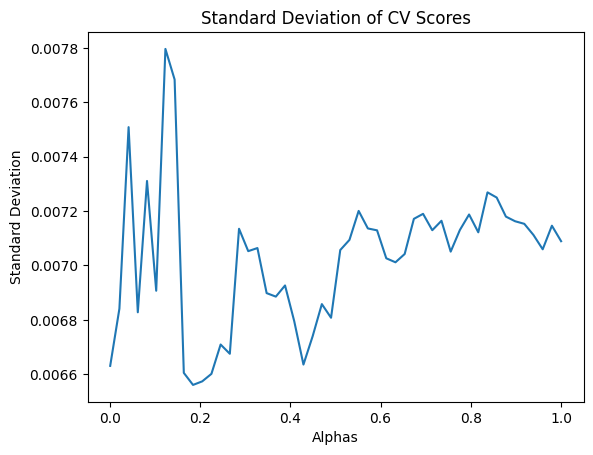

Optimal accuracy: 0.8956020272370844
Optimal Alpha: 0.10293877551020408


In [71]:
method='Over Sampling'
features(x_train_over, x_test, y_train_over ,y_test, method)

-From the results of these experiments, the oversampling technique performed better compared to undersampling, given the low standard deviation of the CV scores. This suggests that oversampling is a reliable method to use. Moving forward, both techniques will be applied for the rest of the analysis. The importance of the low standard deviation in the CV scores is that it indicates the model’s stability across different data splits for a given C (penalty) value.

# Over LG

In [21]:

scaler=StandardScaler()
x_train_scaled_over = scaler.fit_transform(x_train_over)
optimal_model_over= LogisticRegression(solver='liblinear',penalty='l1', C=.1)# C is set to optimal alpha from no Sampling technique
optimal_model_over.fit(x_train_scaled_over, y_train_over)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [22]:
over_col = x.columns.tolist()

# Convert to NumPy array and flatten if necessary
over_col = np.array(over_col).flatten()

# Now create the DataFrame
coef_over = optimal_model_over.coef_

# Ensure coef_over is flattened if it's 2D
coef_over = coef_over.flatten()

coef_over_df = pd.DataFrame({
    'coef_over': coef_over,
    'features': over_col
})


In [23]:
filtered_df = coef_over_df[(coef_over_df['coef_over'] !=0)]

#ceofficients that are big in magnitude
coef_big = filtered_df[(filtered_df['coef_over'] > 0.1) | (filtered_df['coef_over'] < -0.1)]

,coef_over,features
0,-0.506817,ROA(C) before interest and depreciation before...
4,0.013087,Realized Sales Gross Margin
6,0.058600,Pre-tax net Interest Rate
10,-0.029271,Operating Expense Rate
11,0.175297,Research and development expense rate
12,-0.141285,Cash flow rate
13,0.059085,Interest-bearing debt interest rate
14,0.076886,Tax rate (A)
15,-0.209049,Net Value Per Share (B)
18,-2.598959,Persistent EPS in the Last Four Seasons


Text(0.5, 1.0, 'Coefficients that are not Zero Using Oversampling Technique')

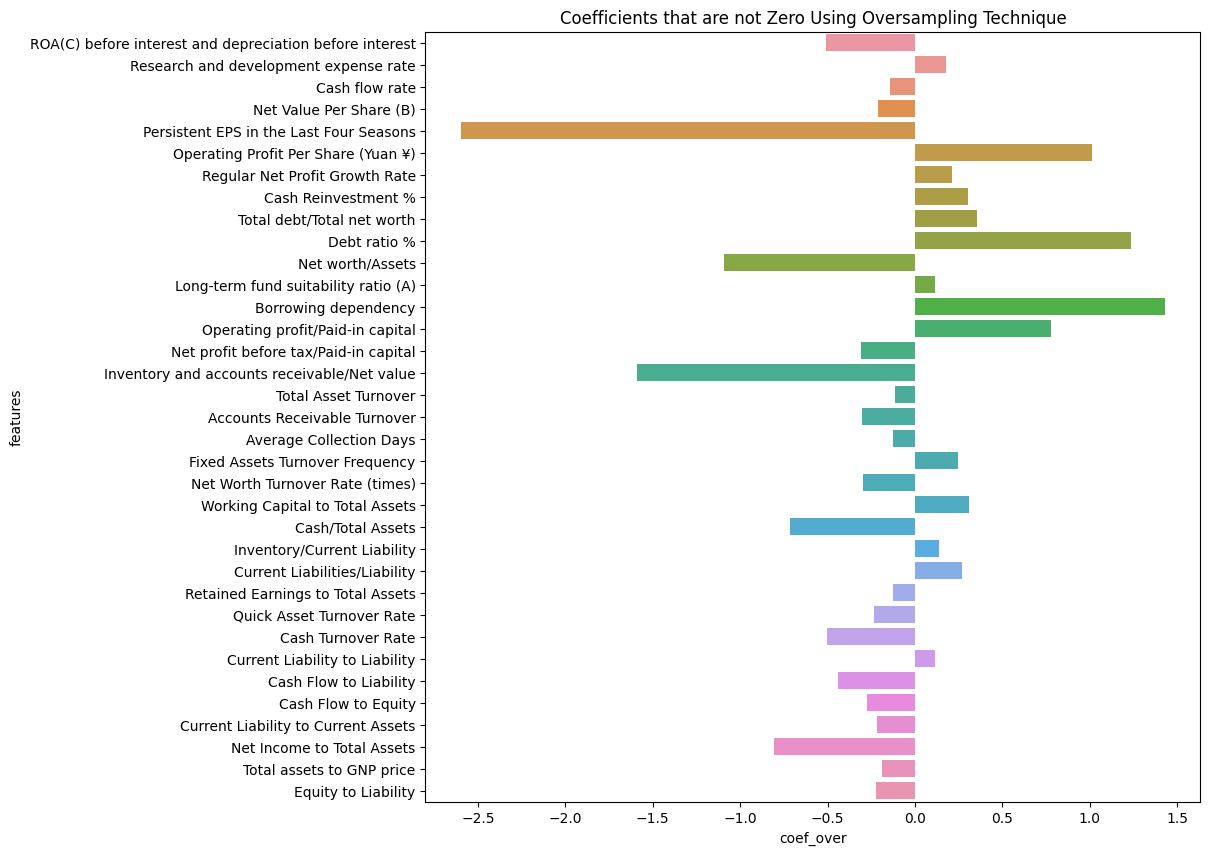

In [24]:
plt.figure(figsize=(10,10))
sns.barplot(x='coef_over', y='features', data=coef_big)
plt.title('Coefficients that are not Zero Using Oversampling Technique')

- After running the regression, there are many more features that have coefficients greater than 0. We'll use these coefficients for EDA to identify and patterns withen the data. Helped remove over 30 features

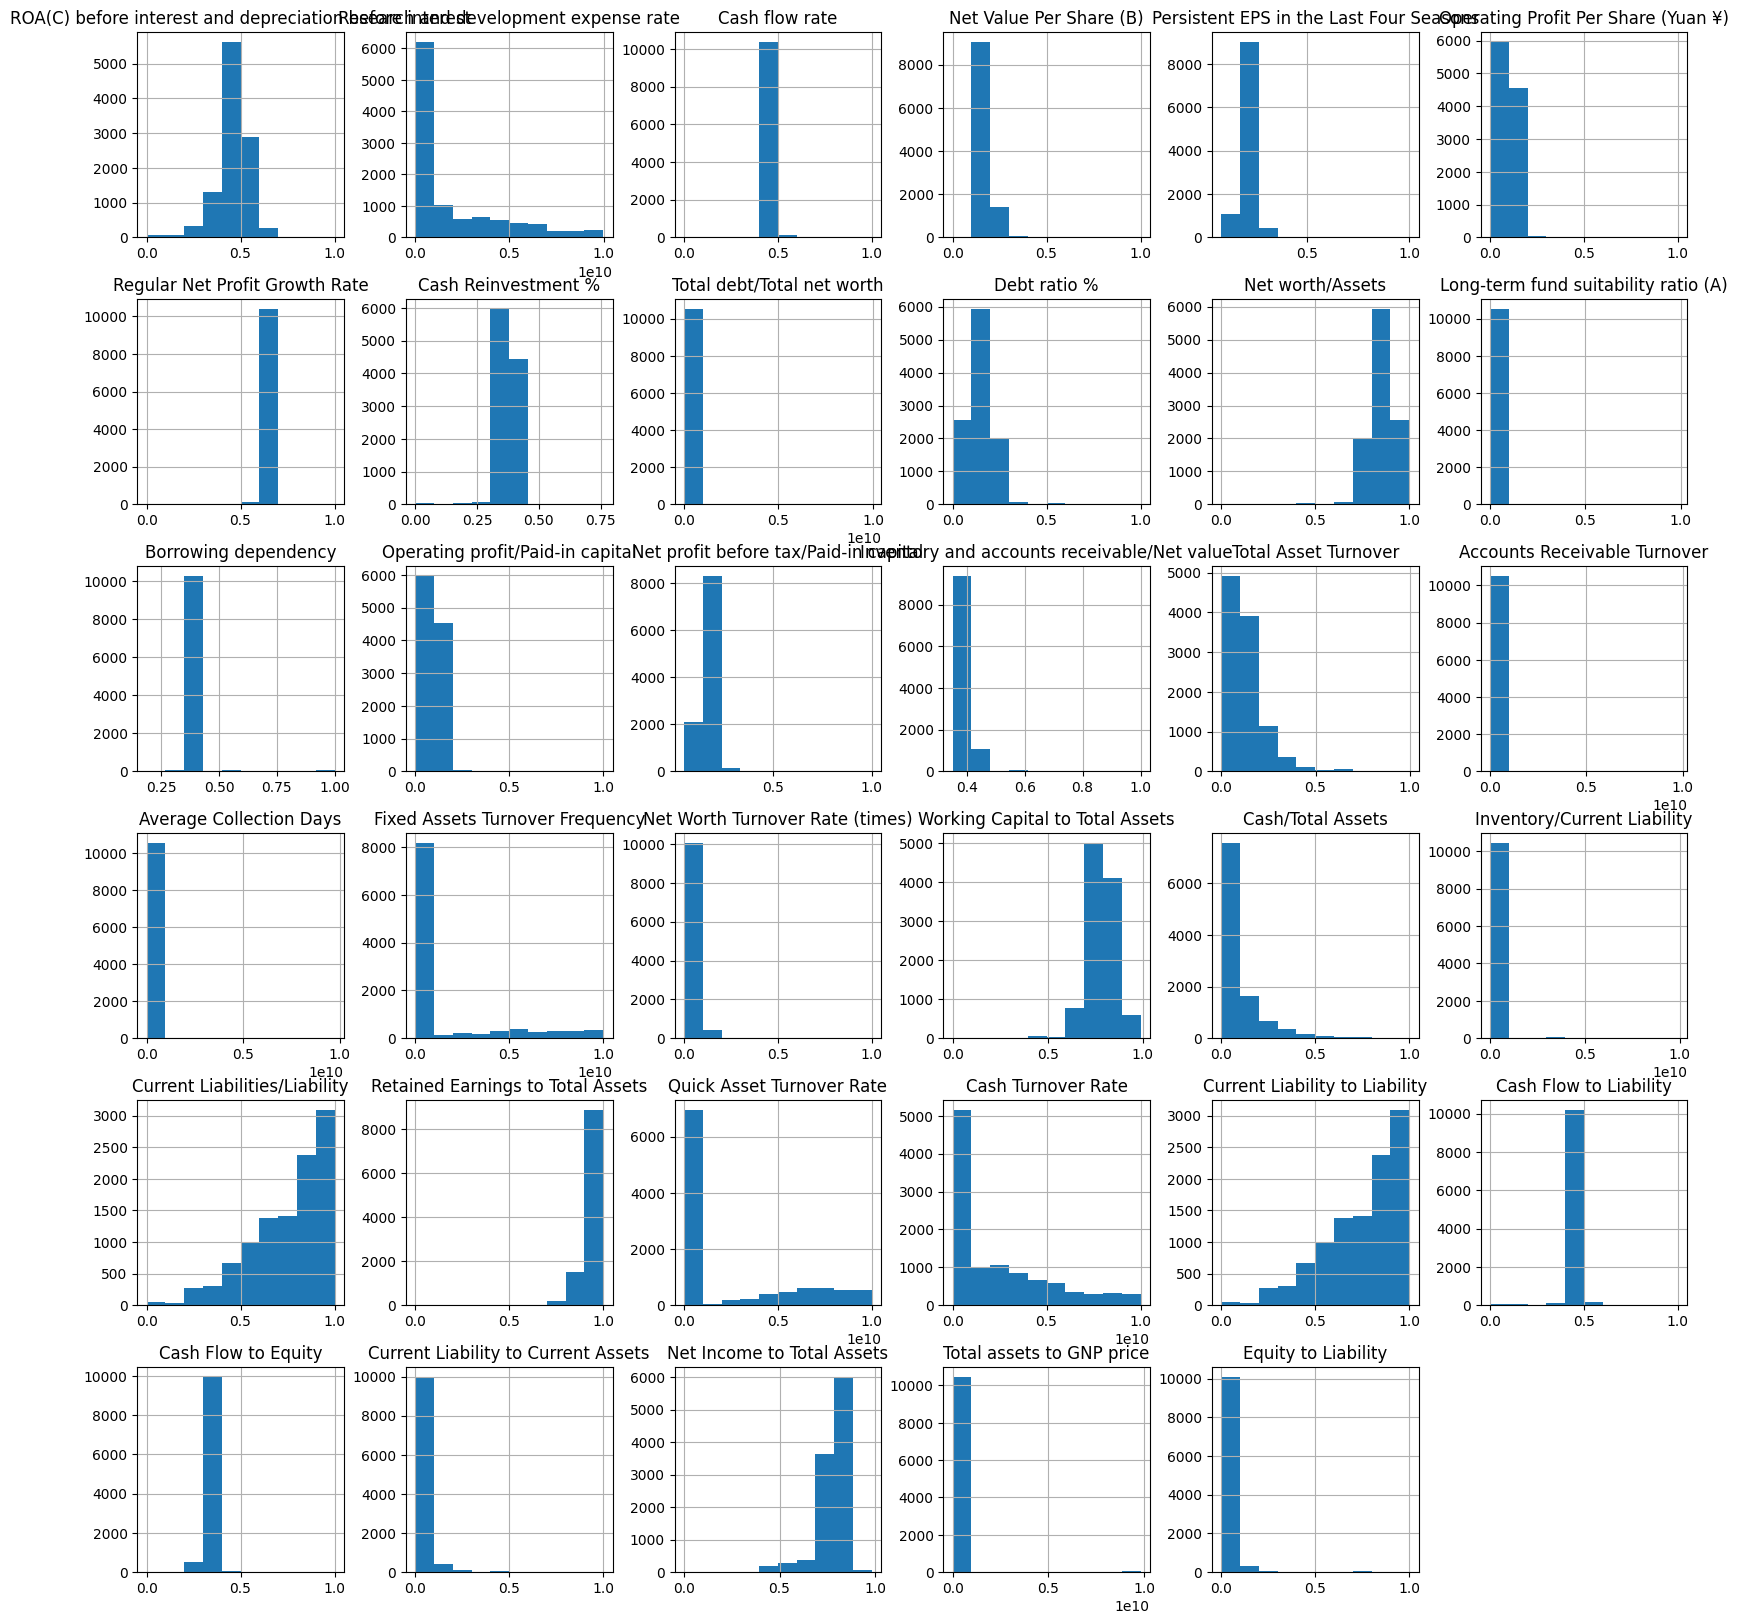

In [24]:
x_train_over[coef_big['features'].tolist()].hist(figsize=(20,20));

<Axes: >

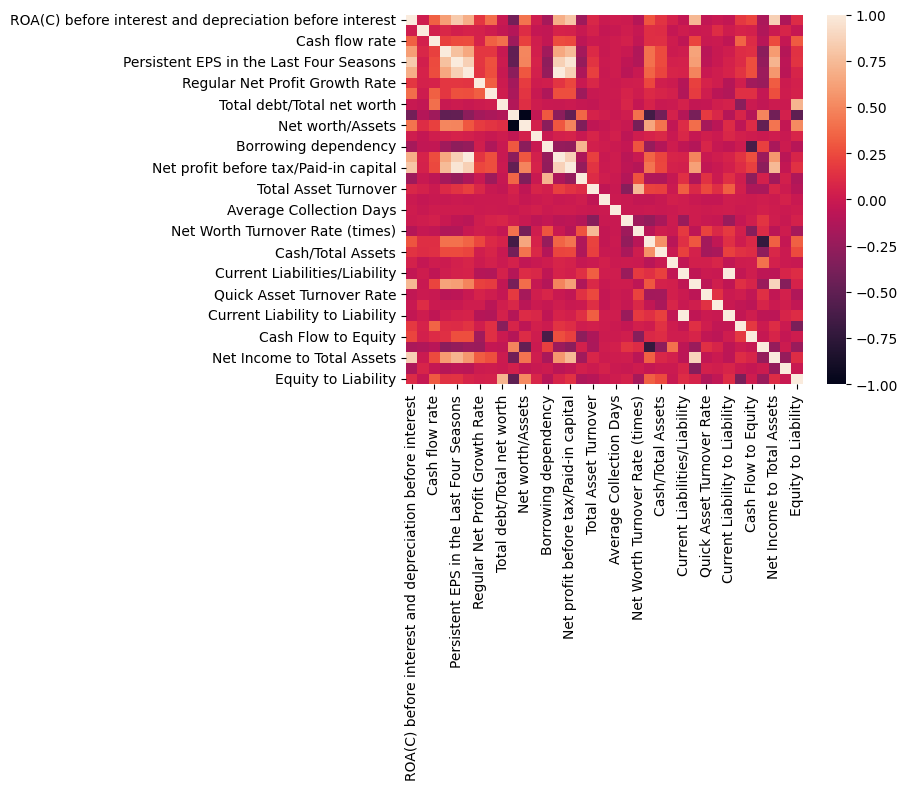

In [52]:
sns.heatmap(x_train_over[coef_big['features'].tolist()].corr())

## list_of_big_coef=coef_big['features'].tolist()
list_of_big_coef[:2]

# Random Forest

In [32]:
df_over_final=filtered_df.copy()

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


param= {
    'n_estimators' == 100 ,
    'max_depth'== None,
    'min_samples_split'== 2,
    'min_samples_leaf'== 1,
    'max_features'== 1,
    'max_leaf_nodes'==None
}

In [36]:

def run_model(x_train_over, x_test_over, y_train_over, y_test_over ,n_estimators=100 ,max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_leaf_nodes=None):
    model_rf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features='sqrt',  # Changed for more flexibility
            max_leaf_nodes=None
        )

    cv_score= cross_val_score(model_rf, x_train_over, y_train_over, scoring ='accuracy',
                                                             cv= RepeatedKFold(n_splits=5, n_repeats=10, random_state=42), n_jobs= -1)
    
    mean_cv= np.mean(cv_score) 
    std_cv= np.std(cv_score)
    
    model_rf.fit(x_train_over, y_train_over)

    #conpute test and training accuracy

    train_pred=model_rf.predict(x_train_over)
    train_accuracy= model_rf.score(x_train_over, y_train_over)
    test_pred= model_rf.predict(x_test_over)
    test_accuracy= model_rf.score(x_test_over, y_test_over)

    return mean_cv, std_cv, train_accuracy, test_accuracy

In [37]:
estimator_list = range(50,1000,50)
cv_scores_rf, std_scores_rf, train_scores_rf, test_scores_rf = [], [], [], []

for i in estimator_list:
    mean_cv, std_cv, train_accuracy, test_accuracy = run_model(x_train_over, x_test_over, y_train_over, y_test_over, n_estimators= i)
    
    cv_scores_rf.append(mean_cv)
    std_scores_rf.append(std_cv)
    train_scores_rf.append(train_accuracy)
    test_scores_rf.append(test_accuracy)
    
    
# Find optimal n_estimators based on maximum CV score
optimal_index = np.argmax(cv_scores_rf)
optimal_param = estimator_list[optimal_index]
optimal_accuracy = cv_scores_rf[optimal_index]

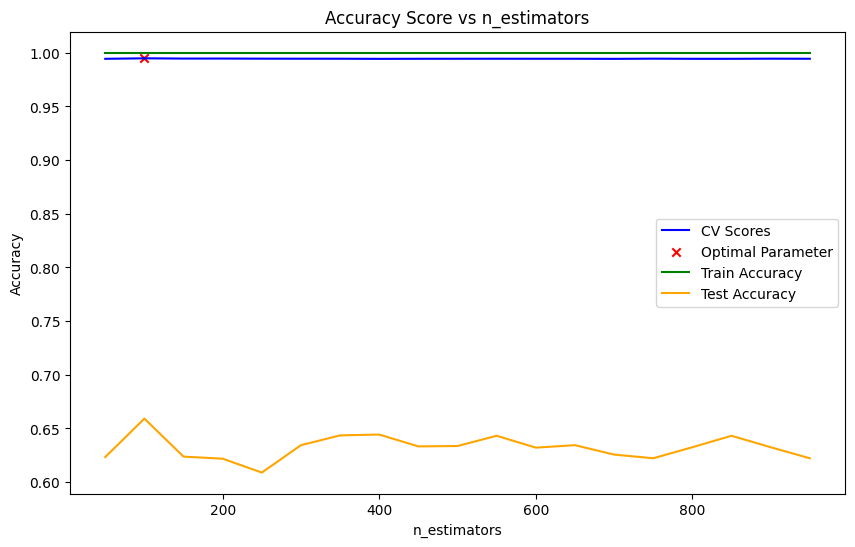

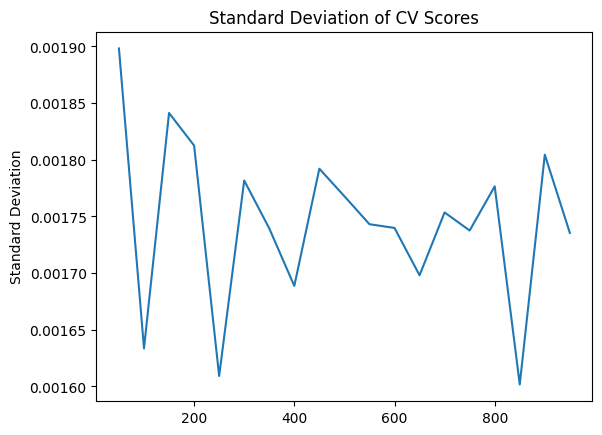

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(estimator_list, cv_scores_rf, label='CV Scores', color='blue')  # Plot CV scores
plt.scatter([optimal_param], [optimal_accuracy], color='red', marker='x', label='Optimal Parameter')  # Plot optimal parameter
plt.plot(estimator_list, train_scores_rf, label='Train Accuracy', color='green')  # Plot Train accuracy
plt.plot(estimator_list, test_scores_rf, label='Test Accuracy', color='orange')  # Plot Test Accuracy
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.title('Accuracy Score vs n_estimators')
plt.legend()
plt.show()

#plot Standard Deviation
plt.plot(estimator_list, std_scores_rf)
plt.title('Standard Deviation of CV Scores')
plt.ylabel('Standard Deviation')
plt.show()

# Max Depth

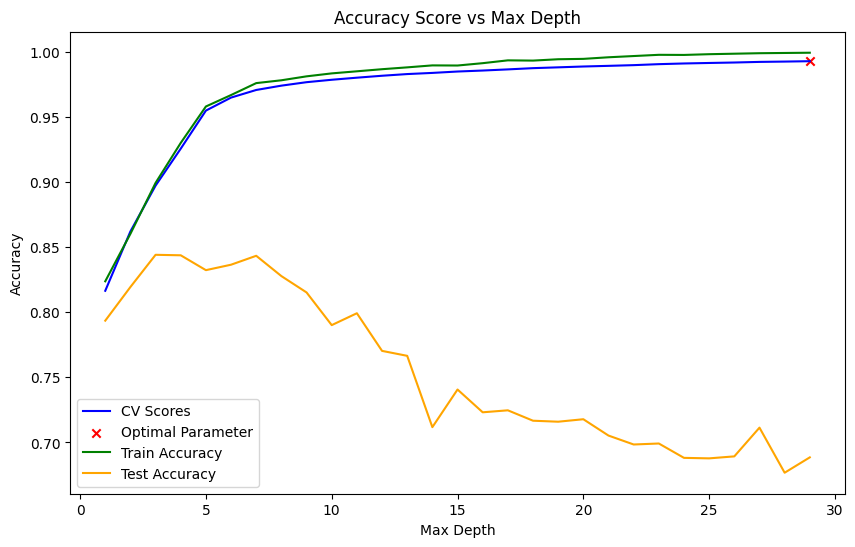

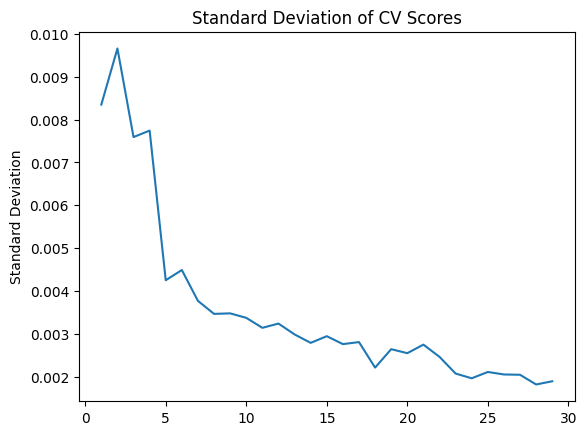

In [39]:
estimator_list = range(1,30)
cv_scores_rf, std_scores_rf, train_scores_rf, test_scores_rf = [], [], [], []

for i in estimator_list:
    mean_cv, std_cv, train_accuracy, test_accuracy = run_model(x_train_over, x_test_over, y_train_over, y_test_over, max_depth= i)
    
    cv_scores_rf.append(mean_cv)
    std_scores_rf.append(std_cv)
    train_scores_rf.append(train_accuracy)
    test_scores_rf.append(test_accuracy)
    
    
# Find optimal n_estimators based on maximum CV score
optimal_index = np.argmax(cv_scores_rf)
optimal_param = estimator_list[optimal_index]
optimal_accuracy = cv_scores_rf[optimal_index]

# Plot CV scores vs n_estimators
plt.figure(figsize=(10, 6))
plt.plot(estimator_list, cv_scores_rf, label='CV Scores', color='blue')  # Plot CV scores
plt.scatter([optimal_param], [optimal_accuracy], color='red', marker='x', label='Optimal Parameter')  # Plot optimal parameter
plt.plot(estimator_list, train_scores_rf, label='Train Accuracy', color='green')  # Plot Train accuracy
plt.plot(estimator_list, test_scores_rf, label='Test Accuracy', color='orange')  # Plot Test Accuracy
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.title('Accuracy Score vs Max Depth')
plt.legend()
plt.show()

#plot Standard Deviation
plt.plot(estimator_list, std_scores_rf)
plt.title('Standard Deviation of CV Scores')
plt.ylabel('Standard Deviation')
plt.show()

# Max Features

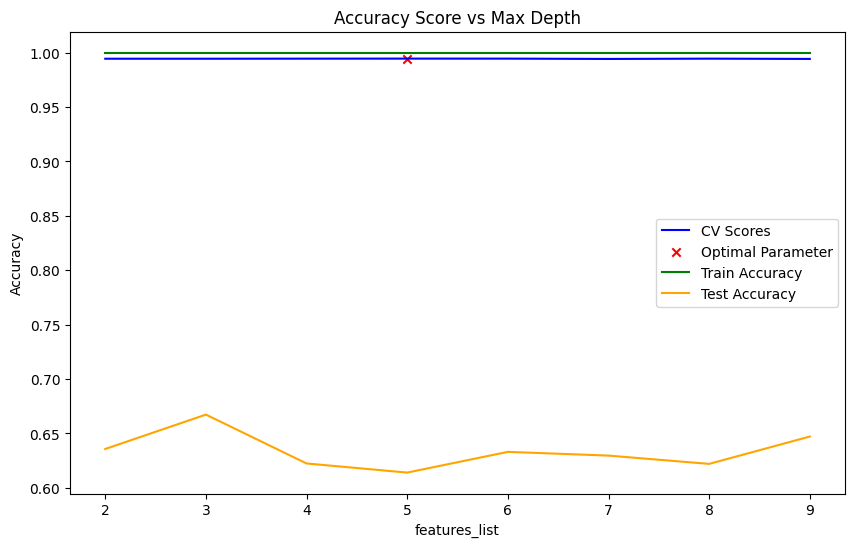

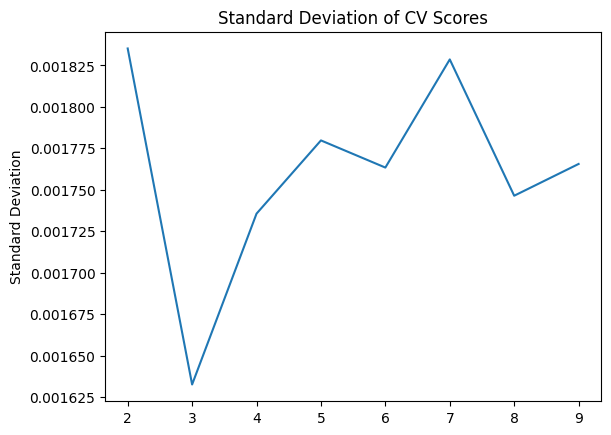

In [41]:
features_list = range(2,10)
cv_scores_rf, std_scores_rf, train_scores_rf, test_scores_rf = [], [], [], []

for i in features_list:
    mean_cv, std_cv, train_accuracy, test_accuracy = run_model(x_train_over, x_test_over, y_train_over, y_test_over, max_features= i)
    
    cv_scores_rf.append(mean_cv)
    std_scores_rf.append(std_cv)
    train_scores_rf.append(train_accuracy)
    test_scores_rf.append(test_accuracy)
    
    
# Find optimal n_estimators based on maximum CV score
optimal_index = np.argmax(cv_scores_rf)
optimal_param = features_list[optimal_index]
optimal_accuracy = cv_scores_rf[optimal_index]

# Plot CV scores vs n_estimators
plt.figure(figsize=(10, 6))
plt.plot(features_list, cv_scores_rf, label='CV Scores', color='blue')  # Plot CV scores
plt.scatter([optimal_param], [optimal_accuracy], color='red', marker='x', label='Optimal Parameter')  # Plot optimal parameter
plt.plot(features_list, train_scores_rf, label='Train Accuracy', color='green')  # Plot Train accuracy
plt.plot(features_list, test_scores_rf, label='Test Accuracy', color='orange')  # Plot Test Accuracy
plt.ylabel('Accuracy')
plt.xlabel('features_list')
plt.title('Accuracy Score vs Max Depth')
plt.legend()
plt.show()

#plot Standard Deviation
plt.plot(features_list, std_scores_rf)
plt.title('Standard Deviation of CV Scores')
plt.ylabel('Standard Deviation')
plt.show()

## Random Forest optimal paramaters

In [45]:
param_grid= {
    'n_estimators' : range(100,300,60) ,
    'max_depth': range(1,6),
    'min_samples_split':  [2,3],
    'min_samples_leaf': [1,2,3],
    'max_features': [1],
    'max_leaf_nodes': [None]}

In [46]:
grid_rf= GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=42),
    scoring= 'accuracy',
    n_jobs=-1
)

In [47]:
grid_rf.fit(x_train_over, y_train_over)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=42),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 6), 'max_features': [1],
                         'max_leaf_nodes': [None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': range(100, 300, 60)},
             scoring='accuracy')

# Model Evaluation

In [48]:
best_rf= grid_rf.best_estimator_
y_pred= best_rf.predict(x_test)

In [49]:
print(f"Best Parameters: {grid_rf.best_params_}")
print(f"Cross Validation Accuracy: {grid_rf.best_score_:4f}")
print(f"Test Accuracy :{accuracy_score(y_test, y_pred):4f}")
print(classification_report(y_test, y_pred, digits=4))

Best Parameters: {'max_depth': 5, 'max_features': 1, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Cross Validation Accuracy: 0.925095
Test Accuracy :0.881965
              precision    recall  f1-score   support

           0     0.9923    0.8842    0.9352      1313
           1     0.2165    0.8235    0.3429        51

    accuracy                         0.8820      1364
   macro avg     0.6044    0.8539    0.6390      1364
weighted avg     0.9633    0.8820    0.9130      1364



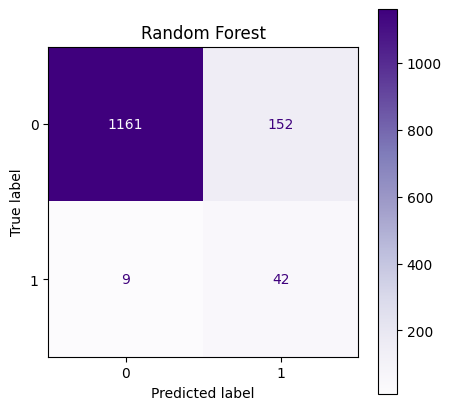

In [50]:
fig, ax= plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay.from_estimator(best_rf, x_test, y_test, cmap='Purples', ax=ax)
ax.set_title('Random Forest')
plt.show()

Class 0 (Negative class):
- Precision: 0.99 — 99% of the time, when the model predicted class 0, it was correct.
- Recall: 0.88 — 88% of the actual class 0 instances were correctly predicted by the model.
- F1-score: 0.93 — A balanced score between precision and recall, indicating excellent overall performance for class 0.
- Support: 1313 — There are 1313 instances of class 0 in the test data.

Class 1 (Positive class):
- Precision: 0.21 — 21% of the time, when the model predicted class 1, it was correct. This is relatively low.
- Recall: 0.82 — Only 82% of the actual class 1 instances were correctly identified by the model. This is quite low, indicating the model  misses a significant portion of positive instances.
- F1-score: 0.34 — This is a moderate score, reflecting the poor performance in both precision and recall for class 1.
- Support: 51 — There are only 51 instances of class 1 in the test data, which is a much smaller number compared to class 0.

Overall Accuracy:
- Accuracy: 0.88 — The model correctly predicted the class for 97% of all instances, which seems very high, but this is heavily influenced by the imbalance in the data (more instances of class 0).

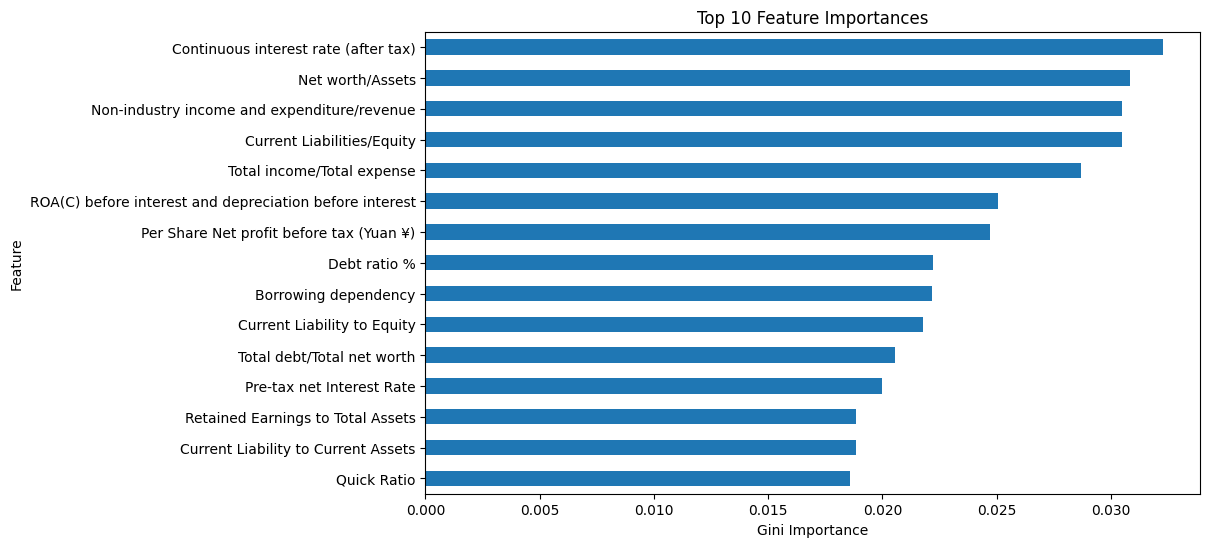

In [55]:
features = x_train_over.columns

# Extract importances directly from the RandomForestClassifier model
importances = grid_rf.best_estimator_.feature_importances_

# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot the 10 most important features
feat_imp.sort_values().tail(15).plot(kind='barh', figsize=(10, 6))

# Adding labels and title
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances")
plt.show()

# split

In [6]:
#Split the data

target = 'bankrupt'
X = df.drop(columns=target)
y = df[target]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6819, 95)
y shape: (6819,)


In [66]:
#divide data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5455, 95)
y_train shape: (5455,)
X_test shape: (1364, 95)
y_test shape: (1364,)


Given the imbalanced dataset, one strategy that can be used is to use the over-sampling technique which involves increasing the number of observations in the True class by randomly making copies of the existing observations


In [67]:
#over-sampling technique
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (10572, 95)


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.498513,0.542848,0.544622,0.599194,0.599036,0.998986,0.797412,0.809330,0.303528,0.781593,...,0.801313,0.005821,0.623649,0.599196,0.840580,0.282564,0.027239,0.566658,1,0.022512
1,0.506606,0.562309,0.558863,0.609334,0.609334,0.999027,0.797450,0.809375,0.303508,0.781637,...,0.810914,0.000481,0.623932,0.609332,0.841339,0.280570,0.026843,0.565395,1,0.026670
2,0.508799,0.561001,0.554687,0.614242,0.614055,0.999094,0.797533,0.809424,0.303514,0.781692,...,0.809740,0.001397,0.623714,0.614241,0.840969,0.277772,0.026864,0.565484,1,0.041556
3,0.499976,0.562527,0.546764,0.597825,0.597825,0.999004,0.797411,0.809329,0.303490,0.781590,...,0.810082,0.000998,0.623986,0.597824,0.841885,0.286871,0.026951,0.565820,1,0.018173
4,0.477892,0.547700,0.529150,0.600362,0.600362,0.998975,0.797412,0.809333,0.303551,0.781584,...,0.804638,0.002826,0.623845,0.600363,0.840885,0.282073,0.026959,0.565848,1,0.023328


In [68]:
#model building
from sklearn.ensemble import RandomForestClassifier
clf =RandomForestClassifier(random_state=42)
clf.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=42)

In [69]:
#cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5)
print(cv_scores)

[0.99243499 0.99432624 0.99432356 0.99668874 0.99432356]


In [70]:
#dictionary of hyperparameters for the model
params = {
    'n_estimators': range(25, 100, 25),  # Number of estimators for RandomForest
    'max_depth': range(10, 50, 10),       # Maximum depth for trees
}

In [71]:
#test different combinations of hyperparameters for a classifier
model = GridSearchCV(
     clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [72]:
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [73]:
#results
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.650032,0.020444,0.006321,0.001795,10,25,"{'max_depth': 10, 'n_estimators': 25}",0.979196,0.977778,0.980605,0.978713,0.980132,0.979285,0.001007,11
1,1.260833,0.044509,0.012384,0.003490,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.979669,0.979196,0.979659,0.979186,0.979186,0.979379,0.000233,10
2,2.009048,0.067962,0.018457,0.002361,10,75,"{'max_depth': 10, 'n_estimators': 75}",0.979196,0.980142,0.977767,0.979659,0.978240,0.979001,0.000880,12
3,0.771777,0.124184,0.006552,0.002955,20,25,"{'max_depth': 20, 'n_estimators': 25}",0.985343,0.985816,0.990066,0.988647,0.988647,0.987704,0.001817,9
4,1.405343,0.049848,0.014362,0.004642,20,50,"{'max_depth': 20, 'n_estimators': 50}",0.986761,0.987707,0.989593,0.990066,0.987701,0.988366,0.001253,8


In [74]:
#select the best perfoming model
best_params = model.best_params_
print(best_params)

{'max_depth': 40, 'n_estimators': 50}


# Model Evaluation

In [75]:
acc_train = model.score(X_train, y_train)
acc_test =  model.score(X_test, y_test)

print("Model Training Accuracy:", round(acc_train, 4))
print("Model Test Accuracy:", round(acc_test, 4))

Model Training Accuracy: 1.0
Model Test Accuracy: 0.9663


The model did perform perfect usiing the training data which indicates over-fitting. But, when testing the model, it did preform very well with unseen data and the consequenses of overfitting might be irrelevant. 

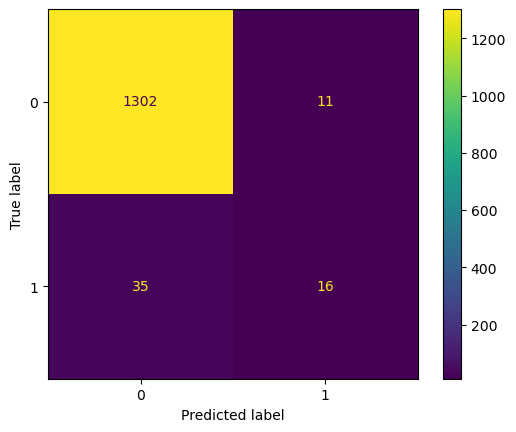

In [76]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [77]:
class_report = classification_report(y_test, model.predict(X_test))
print(class_report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.59      0.31      0.41        51

    accuracy                           0.97      1364
   macro avg       0.78      0.65      0.70      1364
weighted avg       0.96      0.97      0.96      1364



Class 0 (Negative class):
- Precision: 0.97 — 97% of the time, when the model predicted class 0, it was correct.
- Recall: 0.99 — 99% of the actual class 0 instances were correctly predicted by the model.
- F1-score: 0.98 — A balanced score between precision and recall, indicating excellent overall performance for class 0.
- Support: 1313 — There are 1313 instances of class 0 in the test data.

Class 1 (Positive class):
- Precision: 0.59 — 59% of the time, when the model predicted class 1, it was correct. This is relatively low.
- Recall: 0.31 — Only 31% of the actual class 1 instances were correctly identified by the model. This is quite low, indicating the model  misses a significant portion of positive instances.
- F1-score: 0.41 — This is a moderate score, reflecting the poor performance in both precision and recall for class 1.
- Support: 51 — There are only 51 instances of class 1 in the test data, which is a much smaller number compared to class 0.

Overall Accuracy:
- Accuracy: 0.97 — The model correctly predicted the class for 97% of all instances, which seems very high, but this is heavily influenced by the imbalance in the data (more instances of class 0).

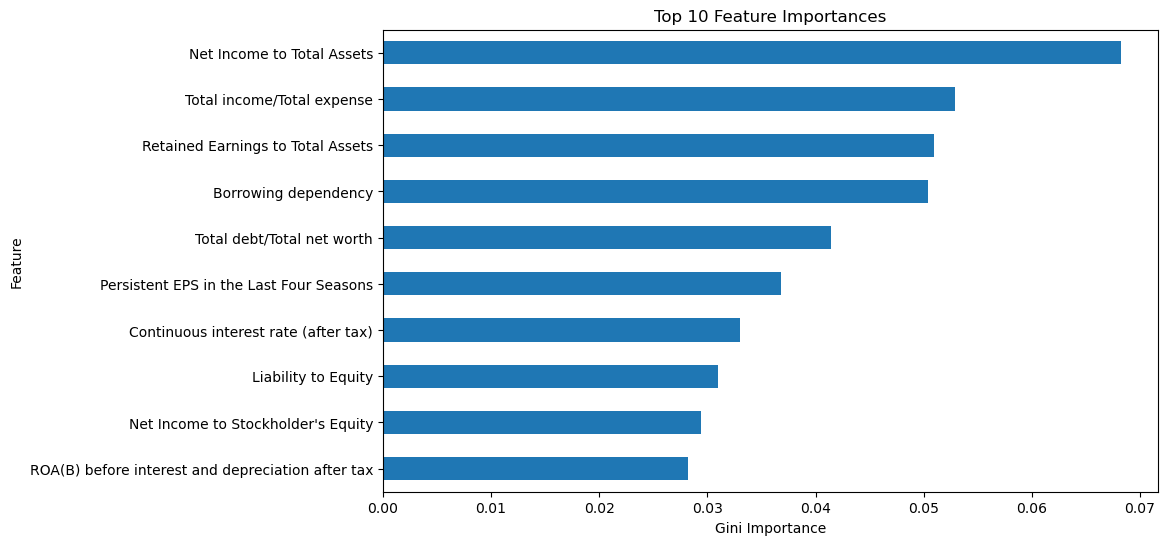

In [89]:
features = X_train_over.columns

# Extract importances directly from the RandomForestClassifier model
importances = model.best_estimator_.feature_importances_

# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot the 10 most important features
feat_imp.sort_values().tail(10).plot(kind='barh', figsize=(10, 6))

# Adding labels and title
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances")
plt.show()

In [91]:
importances = model.best_estimator_.feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
feat_imp.sort_values().tail(10)

ROA(B) before interest and depreciation after tax    0.028199
Net Income to Stockholder's Equity                   0.029447
Liability to Equity                                  0.030999
Continuous interest rate (after tax)                 0.033027
Persistent EPS in the Last Four Seasons              0.036779
Total debt/Total net worth                           0.041459
Borrowing dependency                                 0.050397
Retained Earnings to Total Assets                    0.050906
Total income/Total expense                           0.052894
Net Income to Total Assets                           0.068222
dtype: float64

Net Income to Total Assets (Importance: 0.068222):
- This is the most important feature among the last 10, with a relatively high importance score of 0.068222. It suggests that this feature (Net Income relative to Total Assets) has a significant influence on the model's predictions. This makes sense becasue ROA shows the percentage of how profitable a company's assets are generating in revenue. If a company has a low ROA ratio, it could indicate ineffiencies in assets or issues with expences/revenue.

Total income/Total expense (Importance: 0.052894):
- This feature also has a moderate level of importance (0.052894). This suggests that the relationship between total income and total expenses has some effect on the model's output, although it is not as crucial as "Net Income to Total Assets."

Retained Earnings to Total Assets (Importance: 0.050906):
- Similar to the above, this ratio (retained earnings relative to total assets) has moderate importance in predicting the target variable.